In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).limit(5).all()


[('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-23'),
 ('2017-08-22')]

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

### Apparently this part made no sense in terms of analysing - Shamal's code was used here.
# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= prev_year).all()

session.close()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip = {date: prcp for date, prcp in precipitation}
precip_df = pd.DataFrame(list(precip.items()),columns=['date','precip'])

print(precip_df.shape)
precip_df.head()


(366, 2)


,date,precip
0,2016-08-23,17.8
1,2016-08-24,36.8
2,2016-08-25,2.8
3,2016-08-26,0.3
4,2016-08-27,NaN


Text(0, 0.5, 'precipitation')

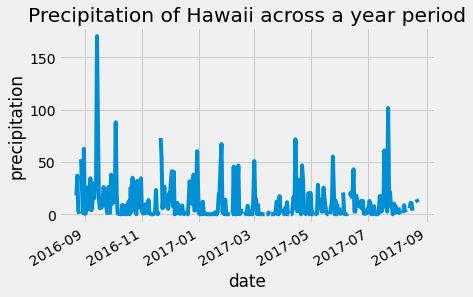

In [41]:
# Use Pandas Plotting with Matplotlib to plot the data
# Change to datetime first to have it properly appear in graph in x axis
precip_df["date"] = pd.to_datetime(precip_df["date"])
precip_df = precip_df.set_index("date")

precip_df.plot(title="Precipitation of Hawaii across a year period",legend=None)\
    .set_ylabel("precipitation")

In [35]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,precip
count,345.000000
mean,10.980000
std,17.891229
min,0.000000
25%,0.300000
50%,3.600000
75%,14.700000
max,170.200000


# Exploratory Station Analysis

In [46]:
# Design a query to calculate the total number stations in the dataset
session = Session(engine)

# Total in terms of distinct stations
session.query(func.count(func.distinct(Station.station))).all()

[(9)]

In [48]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station))\
    .group_by(Measurement.station)\
    .order_by(func.count(Measurement.station).desc())\
    .all()

## Most active station = USC00519281


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [49]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
    .filter(Measurement.station == "USC00519281")\
    .all()

# Lowest, highest, average temperature recorded respectively

[(12.2, 29.4, 22.03582251082252)]

In [53]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
latest_date = session.query(Measurement.date)\
    .filter(Measurement.station == "USC00519281")\
    .order_by(Measurement.date.desc())\
    .first()

print(latest_date)

prev_year = dt.date(2017, 8, 18) - dt.timedelta(days=365)

temperature = session.query(Measurement.date, Measurement.tobs)\
    .filter(Measurement.date >= prev_year)\
    .filter(Measurement.station == "USC00519281")\
    .all()

session.close()

('2017-08-18',)


In [57]:
# Turning query into a dataframe
temp = {date: temp for date, temp in temperature}
temp_df = pd.DataFrame(list(temp.items()),columns=['date','temp'])
temp_df.head()

,date,temp
0,2016-08-18,26.7
1,2016-08-19,26.1
2,2016-08-20,27.2
3,2016-08-21,26.1
4,2016-08-22,25.6


Text(0.5, 0, 'Temperature (C)')

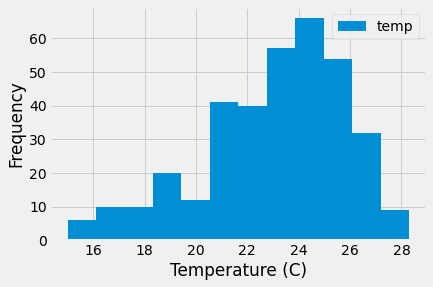

In [60]:
temp_df.plot(kind='hist', bins=12)\
    .set_xlabel("Temperature (C)")